In [1]:
import os
import shutil
import subprocess

from IPython.display import Image

Create experiment demo directory.

In [2]:
if os.access('experiments_demo', os.F_OK):
    !rm -rf experiments_demo
!mkdir experiments_demo

Generate model parameters.

In [3]:
!python2 model_generation/generate_synth_images.py experiments_demo

generating network description for experiments_demo
setting up directories
writing network parameters


Generate samples from the model parameters.

In [4]:
if os.access('sampling/sample.o', os.F_OK):
    !rm -f sampling/sample.o
if os.access('sampling/sampling.o', os.F_OK):
    !rm -f sampling/sampling.o
if os.access('sampling/mtrand.o', os.F_OK):
    !rm -f sampling/mtrand.o
if os.access('sampling/sample', os.F_OK):
    !rm -f sampling/sample
%cd -q sampling
!make &>/dev/null
%cd -q ..

!mkdir experiments_demo/samples
!./sampling/sample experiments_demo 0 10000

sampling from experiments_demo network taking 10000 samples with seed 0
read 8 priors
read 64 noises
read weights
sample 0
sample 1000
sample 2000
sample 3000
sample 4000
sample 5000
sample 6000
sample 7000
sample 8000
sample 9000


Train the algorithm on the data set, with 16 latent variables (there are 8 ground truth latent variables), and 2 runs with different random seeds.

Note: on our system, this step can take up to 40 minutes to run. For test purposes, one may reduce the number of epochs in training/train_recognition_network.py (the "epochs" field of the config object).

In [5]:
!mkdir experiments_demo/runs
%cd -q training
!python2 run_train_recognition_network.py ../experiments_demo/samples/raw_samples_n10000_s0 ../experiments_demo/runs 16 2
%cd -q ..

Evaluate the results. Shows the number of latent variables matching ground truth latent variables in each run, whether each run has perfect recovery, and the log-likelihood for each run.

In [6]:
!python2 visualization/evaluate_results.py experiments_demo/true_params experiments_demo/runs 100 2

Matches: [8, 6]
Perfect: [True, False]
Log-likelihood: [-10.8971890771, -12.2090880369]


Visualizes the resulting models for the two runs.

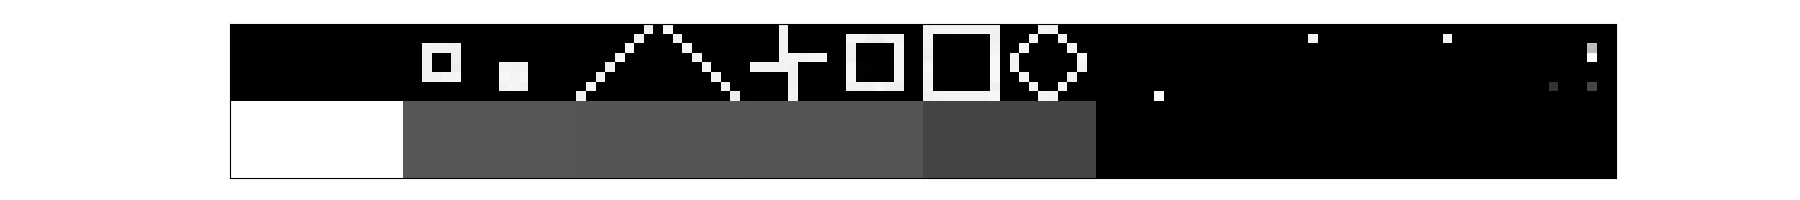

In [7]:
# run 1
!python2 visualization/visualize_images.py experiments_demo/runs/R1/model_epoch1000.dat experiments_demo/img1.png
Image(filename='experiments_demo/img1.png')

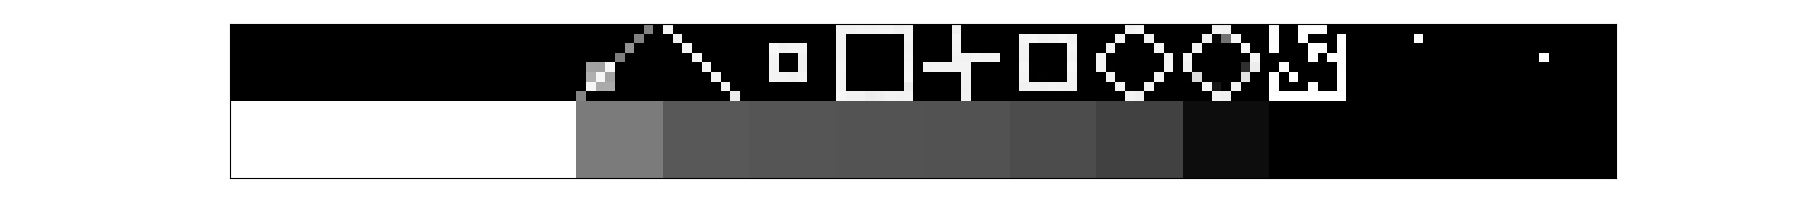

In [8]:
# run 2
!python2 visualization/visualize_images.py experiments_demo/runs/R2/model_epoch1000.dat experiments_demo/img2.png
Image(filename='experiments_demo/img2.png') 